# Assignment 3 #
### Due: Monday, October 9th to be submitted via Canvas by 11:59 pm ###
### Total points: **90** ###

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names, UT EIDs and the homework group.**  

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

1. Homework Group - 56
2. Student Names - Santhosh Kumar Ramkumar & Sanjhana Rangaraj

## Q1. (30 points) - Comparing MLPs

In this problem, we will be comparing different MLP configurations on the California Housing dataset and the Diabetes dataset.

In [21]:
import numpy as np
from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing, load_diabetes

In [22]:
seed = 42

In [23]:
# Load the Calinifornia Housing dataset and do train/val/test split
california_housing = fetch_california_housing()
housing_X, housing_y = california_housing['data'], california_housing['target']
housing_X_train, housing_X_tmp, housing_y_train, housing_y_tmp = train_test_split(housing_X, housing_y, test_size=0.4, random_state=seed)
housing_X_val, housing_X_test, housing_y_val, housing_y_test = train_test_split(housing_X_tmp, housing_y_tmp, test_size=0.5, random_state=seed)

housing_scaler = StandardScaler()
housing_X_train = housing_scaler.fit_transform(housing_X_train)
housing_X_val = housing_scaler.transform(housing_X_val)
housing_X_test = housing_scaler.transform(housing_X_test)
print(california_housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [24]:
# Load the Diabetes dataset and do train/val/test split
diabetes = load_diabetes()
diabetes_X, diabetes_y = diabetes['data'], diabetes['target']

diabetes_X_train, diabetes_X_tmp, diabetes_y_train, diabetes_y_tmp = train_test_split(diabetes_X, diabetes_y, test_size=0.4, random_state=seed)
diabetes_X_val, diabetes_X_test, diabetes_y_val, diabetes_y_test = train_test_split(diabetes_X_tmp, diabetes_y_tmp, test_size=0.5, random_state=seed)

diabetes_scaler = StandardScaler()
diabetes_X_train = diabetes_scaler.fit_transform(diabetes_X_train)
diabetes_X_val = diabetes_scaler.transform(diabetes_X_val)
diabetes_X_test = diabetes_scaler.transform(diabetes_X_test)
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

**Part 1** **(10 pts)**. Write the training and evaluation functions of the MLP. Use the default parameter values of sklearn.neural_network.MLPRegressor except:

*   **hidden_layer_size**: given by train_mlp parameter
*   **learning_rate_init**: given by a list of search space
*   **random_state**: given by train_mlp parameter
*   **max_iter**: fix at 300



In [5]:
def train_mlp(hidden_layer_size, X_train, y_train, X_val, y_val, seed):
    learning_rate_list = [1e-1, 1e-2, 1e-3, 1e-4]
    best_r2 = -np.inf # Determine the best model based on the R2 score on validation set # TO HIDE
    for lr in learning_rate_list:
        # Initialize MLPRegressor
        
        model = MLPRegressor(hidden_layer_sizes=hidden_layer_size, random_state=seed, max_iter=300, learning_rate_init = lr)

        # Fit the MLPRegressor to training data
        
        model.fit(X_train, y_train)
        

        # Predict and evaluate on train and validation data
        mse_train, r2_train = eval_model(model, X_train, y_train)
        mse_val, r2_val = eval_model(model, X_val, y_val)
        print(f"Learning rate: {lr} MSE train: {mse_train} R2 train: {r2_train} MSE val: {mse_val} R2 val: {r2_val}")

        # Record the best model according to R2 score on validation set
        if r2_val > best_r2:
            best_r2 = r2_val
            best_model = model
            best_lr = lr
            
    return best_model, best_lr, best_r2

def eval_model(model, X, y):
    # Predict and evaluate
    pred_y = model.predict(X)
    r2 = model.score(X, y)
    mse = mean_squared_error(y,pred_y)
    return mse, r2


**Part 2** **(5 pts)**.
Train two MLPs on the **housing dataset** with the following two different hidden layer size configurations and show their **MSE** and **R2 score** on the **test set**.
*   (8)
*   (64, 64)



In [6]:
### START CODE ###

model, best_lr, best_r2 = train_mlp((8), housing_X_train, housing_y_train, housing_X_val, housing_y_val, seed)
mse_test, r2_test = eval_model(model, housing_X_test, housing_y_test)
### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Learning rate: 0.1 MSE train: 0.35027525329858894 R2 train: 0.7359828150770656 MSE val: 0.3726774082659484 R2 val: 0.7144970949876447
Learning rate: 0.01 MSE train: 0.334521824008715 R2 train: 0.7478568370492932 MSE val: 0.35351651284456515 R2 val: 0.7291759866620738
Learning rate: 0.001 MSE train: 0.3343894234574139 R2 train: 0.7479566329112834 MSE val: 0.3549904264505432 R2 val: 0.7280468422414288
Learning rate: 0.0001 MSE train: 0.4331418308870668 R2 train: 0.673522791615294 MSE val: 0.4592155463352194 R2 val: 0.6482014482295081
Test MSE: 0.35000842201340565 Test R2: 0.7447291587040576


C:\Users\rsk29\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [7]:
### START CODE ###
model, best_lr, best_r2 = train_mlp((64,64), housing_X_train, housing_y_train, housing_X_val, housing_y_val, seed)
mse_test, r2_test = eval_model(model, housing_X_test, housing_y_test)
### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Learning rate: 0.1 MSE train: 0.2973119174077736 R2 train: 0.7759035080587677 MSE val: 0.32352841271597255 R2 val: 0.7521494471204143
Learning rate: 0.01 MSE train: 0.16854813399444332 R2 train: 0.8729581851924515 MSE val: 0.3097709668004944 R2 val: 0.7626888323562815
Learning rate: 0.001 MSE train: 0.20584124261738043 R2 train: 0.8448488013209626 MSE val: 0.28680314360190856 R2 val: 0.780284157695474
Learning rate: 0.0001 MSE train: 0.2674151290220707 R2 train: 0.7984379744062987 MSE val: 0.31262030057434054 R2 val: 0.760505997948454
Test MSE: 0.2714596719780809 Test R2: 0.8020169387778012


C:\Users\rsk29\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


**Part 3** **(5 pts)**. Train a **linear regression model** on the **housing dataset** and show their MSE and R2 scores on the test set. How do the performances of the two MLPs and the linear regression model compare, and what do you think causes the difference?

In [41]:
### START CODE ###
lm_model = LinearRegression()

lm_model.fit(housing_X_train, housing_y_train)

pred_y = lm_model.predict(housing_X_test)

r2_test = lm_model.score(housing_X_test, housing_y_test)
mse_test = mean_squared_error(pred_y,housing_y_test)



### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Test MSE: 0.5546246533101034 Test R2: 0.5954968710766684


<div style="background-color: #B1D8B7; padding: 10px;"> 

Comparison of the two MLP models and Linear Regression
    
Between the **MLP with 8 hidden layers** and the **MLP with (64,64) hidden layers** , The (64,64) has slightly lower MSE and much better R2 score ( 80% compared to 75%). This is understandable as there is **more Capacity** for learning with more hidden layers. 
    
The performance of a linear regression model in comparison to these two MLP models is poor. This might be due to the non-linearity in the relationship between the target variable and the selected features which can be modeled efficiently by MLPs are they use non-linear functions like sigmoid, softmax etc.,
    
Bottomline is **MLP are complex models capable of capturing non-linear relationships better than simple linear regression**.
    


</div>

**Part 4** **(5 pts)**. Now, train two MLPs on the **diabetes dataset** with the following two different hidden layer size configurations and show their **MSE** and **R2 score** on the **test set**.
*   (8)
*   (64, 64)

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [43]:
### START CODE ###

model, best_lr, best_r2 = train_mlp((8), diabetes_X_train, diabetes_y_train, diabetes_X_val, diabetes_y_val, seed)
mse_test, r2_test = eval_model(model, diabetes_X_test, diabetes_y_test)

### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Learning rate: 0.1 MSE train: 2476.346759502432 R2 train: 0.585898539459291 MSE val: 2517.6324149131624 R2 val: 0.5632838571464869
Learning rate: 0.01 MSE train: 2923.5109570774443 R2 train: 0.511122522487204 MSE val: 2897.769455293564 R2 val: 0.4973441349506217
Learning rate: 0.001 MSE train: 23187.857938274905 R2 train: -2.8775368603787332 MSE val: 21269.44841782192 R2 val: -2.689462932964871
Learning rate: 0.0001 MSE train: 28400.91006149956 R2 train: -3.7492776575100377 MSE val: 26368.757515117697 R2 val: -3.5740045312528217
Test MSE: 3031.314085402528 Test R2: 0.4759604846674893


In [44]:
### START CODE ###

model, best_lr, best_r2 = train_mlp((64,64), diabetes_X_train, diabetes_y_train, diabetes_X_val, diabetes_y_val, seed)
mse_test, r2_test = eval_model(model, diabetes_X_test, diabetes_y_test)


### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Learning rate: 0.1 MSE train: 1206.4253098147994 R2 train: 0.798258268592414 MSE val: 3723.5437400131664 R2 val: 0.35410282682550276
Learning rate: 0.01 MSE train: 2243.7063917974406 R2 train: 0.6248012963844647 MSE val: 2647.383790966997 R2 val: 0.5407767905292495
Learning rate: 0.001 MSE train: 2708.3640005183597 R2 train: 0.5470999834789378 MSE val: 2934.4456382474004 R2 val: 0.49098217318872495
Learning rate: 0.0001 MSE train: 25172.631134438427 R2 train: -3.2094360486565927 MSE val: 23365.034950969693 R2 val: -3.0529697190830607
Test MSE: 3048.801456733653 Test R2: 0.47293734904425166


**Part 5** **(5 pts)**. Train another linear regression model on the **diabetes dataset** and show its **MSE** and **R2 score** on the **test set**. How do the performances of two MLPs and the linear regression model compare? Is the performance order on the diabetes dataset the same as the one on the housing dataset? If not, what causes the difference?

In [45]:
### START CODE ###
lm_model = LinearRegression()

lm_model.fit(diabetes_X_train, diabetes_y_train)

pred_y = lm_model.predict(diabetes_X_test)

r2_test = lm_model.score(diabetes_X_test, diabetes_y_test)
mse_test = (mean_squared_error(pred_y,diabetes_y_test))



### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Test MSE: 3245.6114009752373 Test R2: 0.4389137589815667


<div style="background-color: #B1D8B7; padding: 10px;"> 

In the diabetes dataset, the two MLPs and the linear regression models are giving roughly similar mse and r2_scores. MLP are only slightly better than Linear regression. 
    
The performance of the models in the California Housing dataset is way better than the performance of the models on the Diabetes dataset. The MSE is quite high and the R2_score is significantly lower than California Housing models.
    
The **key reason for the difference in results** between the California Housing data models and Diabetes models is the **lack of data points in the Diabetes dataset**. We can clearly see that the models are underitting in the diabetes dataset irrespective of whether they are MLPs or linear regression. Also this could be due to the irreducible error being high for the diabetes dataset as we are getting very similar results for the two MLPs and linear regression.
    



    
</div>

# Q2. (20 points) Tensorflow Playground
In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).


Select **Classification** as the Problem Type. Among the four datasets shown in DATA, please select the top left dataset.

Use the following settings as the DEFAULT settings for all subquestions:


*   Learning rate = 0.03
*   Activation = Tanh
*   Regularization = None
*   Ratio of training to test data = 50%
*   Noise = 0
*   Batch Size = 30
*   input as  𝑋1  with  𝑋2
*   One hidden layer with 4 neurons










a) **(4 pts)** Use the DEFAULT setting and run two experiments -

1.   Using Tanh as the activation function
2.   Using the Linear activation function.

Report the train, test losses for both at the end of 1000 epochs. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this?


<font color='green'>

Tanh:   Training Loss - 0.009 | Test Loss - 0.026   
Linear: Training Loss - 0.493 | Test Loss - 0.504
    
Clearly we can see that the relationship between the feature and target is non-linear. It looks like a circle will be able to split the two categories accurately. With this inital guess / finding we can clearly see the Tanh (Non-linear function) has a decision boundary very close to a circle that splits the two categories of target variable. On the other hand, the linear function tries to draw a decision boundary which is a line that splits the space into two halves where there is almost equal distribution of both categories in each half. 
    
The reason for the difference in the decision boundary is simply that Tanh is a non-linear function so it was able to capture the non-linear relationship between target and feature whereas a linear function couldn't.

</font> 

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with Tanh as the activation.

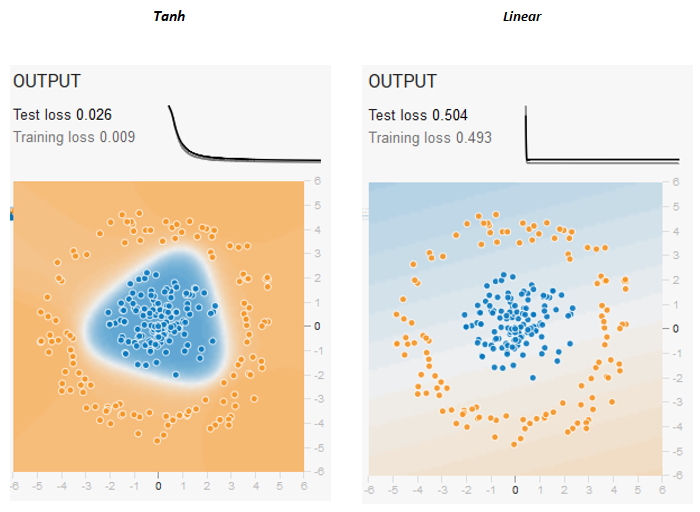

b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT.


1.   Report the training loss and test loss at the end of 1000 epochs using 2 neurons and 8 neurons in the hidden layer.

<font color='green'>
    
2 Neurons: Training Loss - 0.158 | Test Loss - 0.277   
8 Neurons: Training Loss - 0.005 | Test Loss - 0.016
    
</font> 

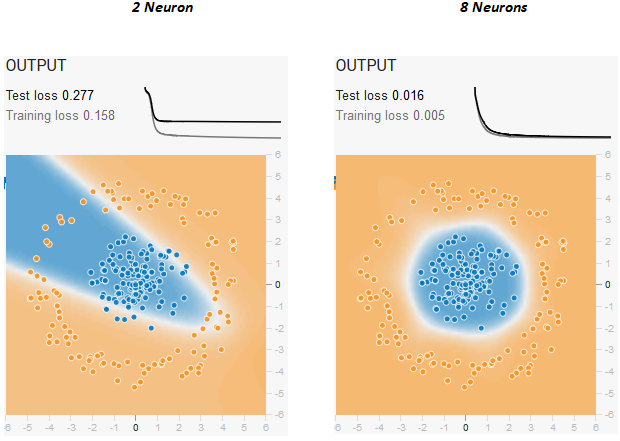

2.   What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this?

<font color='green'>
    
When you have **only 2 neurons**, logically the final output function can **only change its direction once**. To model a relationship that is circular we need at least 3 neurons so that we will have a final output function that changes direction twice so as to complete a circle. 
    
It is also reasonable to imagine a MLP as multiple single layer perceptrons. Each single layer perceptron will predict a line. So if we have 2 neurons, then we will get 2 line where the decision boundary changes it direction once. When we have 3 lines (think of a trianle) or more, we can change direction at least twice and this will result in achieving the circle that separates the two categories.
    
This is the reason when we have 2 neurons, we get a conic section which cannot model the circular relationship. As we move above 2 neuron to 8 neurons. We can comfortably model the circular relationship.
    
</font>

c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT.

1.   For learning rate 10, 1, 0.1, 0.01 and 0.0001, report the train, test losses at the end of 100 epochs, 500 epochs and 1000 epochs respectively.
2.   What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? Also report your observations on the training and test loss curve (observe if you see noise for certain learning rates and reason why this is happening).

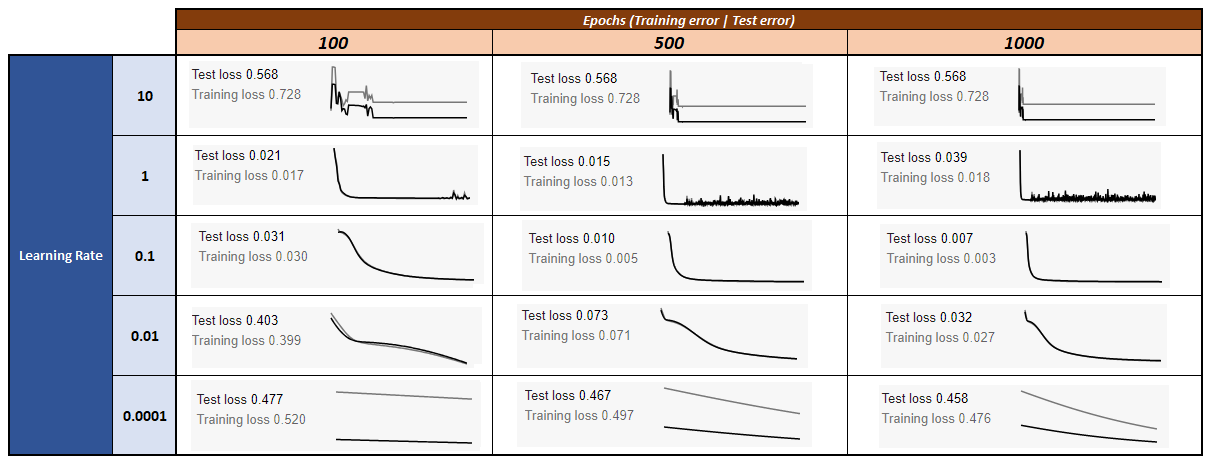

<font color='green'>
    
**Change in loss vs learning rate**   

Learning shouldn't be too high nor too low is the important finding. When it is too high, the model tends to take bigger steps missing to converge when expected. On the other hand, when the learning is lower than the optimal, the model tends to get stuck at local minimum and / or take long time to converge.
    
**Change in loss vs Epochs** 
    
As we increase the epochs, we can observe that there is reduction in the MSE on average. With more epochs, we get to refine the weights of the different neurons though back propagation which results better prediction of the relationship between target and features.
    
**Noise in training and test loss curve**
    
Noise in the loss curve arises due to oscillations around the minima. The model keeps stepping over minima and getting back towards it repeatedly. Sometimes, the amount by which it steps over the minima keeps reducing as we increase the Epochs and that is why the error keeps reducing little by little but it is also possible for the model to keep oscillating with out any improvement
    
</font> 

d) **(4 pts)** Effect of the number of layers:

1.   Change your activation to ReLU and use a single hidden layer with 4 neurons and then add another hidden layer with 3 neurons and train both your models for 1000 epochs.
2.   Comment on your final models and decision boundaries and observe your training and test loss curves as well.

<font color='green'>
    
Adding an extra hidden layer in a neural network enhances its capacity to capture non-linear relationships within the data more effectively. Although the inclusion of another hidden layer results in only a modest reduction in test loss, it noticeably improves the network's ability to delineate decision boundaries between different classes or categories.

    
</font>

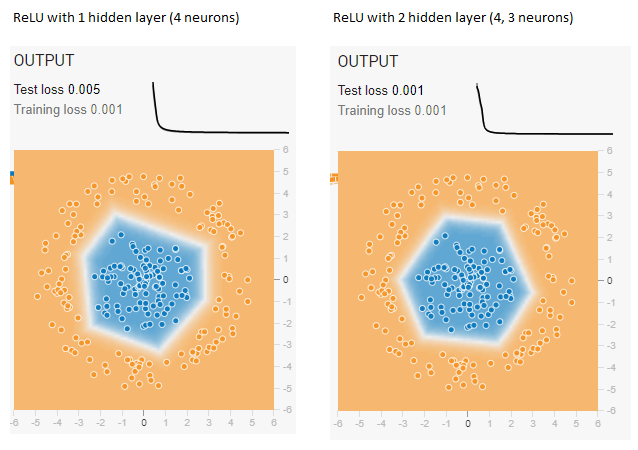

e) **(4 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as  sin(𝑋1),𝑋21  etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc.

<font color='green'>
    
Ideally we dont need a complex non-linear function to predict this pattern as we can clearly see that its circular. As the equation of a circle is given by x^2 + y^2 = C, we simple run a linear model with squared input variables and  0 hidden layers --> learning rate as high as 1 has been used to achieve the best possible result with lesser epochs.
    
In general what helps with lowering the loss -    
    
1. Identifying the right features and appropriate feature engineering (here, we are squaring the features)
    
2. Choosing appropriate capacity for the neural network so as to avoid underfitting / overfitting. Capacity refers to number of hidden layers and nodes. Adding so many hidden layers can lead to overfitting while a single hidden layers with fewer nodes will lead to underfitting.   
    
3. Activation functions needs to be selected based on the relationship between target variable and features. If they are non-linar which can be identified by simple scatter plots, then we can use one of sigmoid, tanh or ReLU. Of these 3 ReLU is considered to be the best because it can handle the vanishing gradient problem and it is compuationally efficient.   
    
4. Learning not too high or not too low. As detailed in one of the above responses, learning rate should be selected such that we dont take very large steps which can lead to divergence nor very small steps which gets stuck at local minima.   
    
5. Epochs needs to decided based on an interative process. Like other parameters, it shouldn't be too low or too high. Early stopping is an approach decide the number of Epochs. We keep increasing epochs until the validation error stops reducing significantly so that we can avoid overfitting.   

</font>

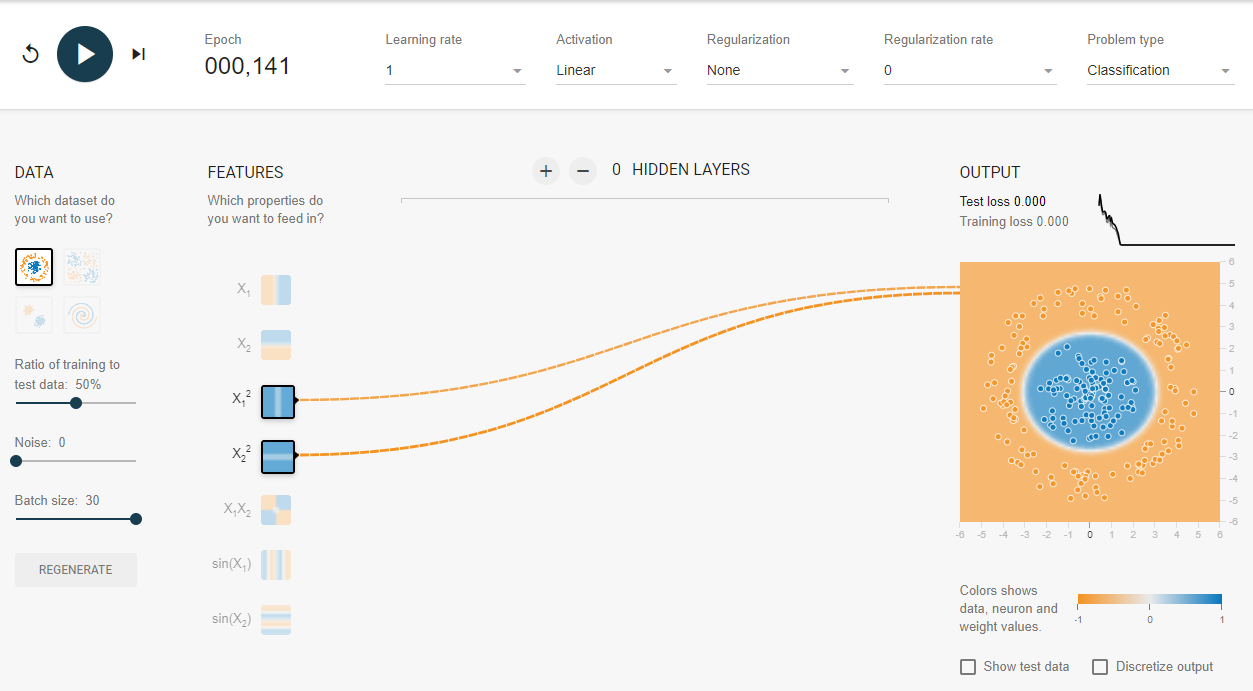

# Q3. (10 points) - Principal Component Analysis

**Part 1.** (5 points) Briefly explain the main principle behind the Principal Component Analysis algorithm. In what sense is the selection of the eigenvectors to represent the data an optimal choice.  How do you reconstruct (a noisy version of) the original data from the eigenvectors and the scores?

**Part 2**. (5 points) Read this [article](https://erdem.pl/2020/04/t-sne-clearly-explained) on t-SNE, a dimensionality reduction technique for visualization and explain it in your own words in one or two paragraphs.

<div style="background-color: #B1D8B7; padding: 10px;">

**Part 1**

Principal Component Analysis (PCA) is an **unsupervised learning algorithm** technique used to examine the interrelations among a set of variables. The main principle behind PCA is to **reduce the dimensionality of a dataset** while preserving the most important patterns or relationships between the variables without any prior knowledge of the target variables.


The selection of eigenvectors to represent the data in PCA is an optimal choice for several reasons. First, it maximizes the variance captured by the selected components, meaning that the most significant sources of variation in the dataset are preserved. Second, the eigenvectors are orthogonal to each other, which simplifies the interpretation of the components and avoids redundancy. Third, the eigenvectors are ranked based on their associated eigenvalues, so selecting the eigenvectors with the largest eigenvalues ensures that the selected components explain the most significant portion of the total variance in the data.

To reconstruct (a noisy version of) the original data from the eigenvectors and the scores, we simply multiply the scores by the transpose of the eigenvectors. This gives us a reconstructed version of the data in the original high-dimensional space.
However, it is important to note that PCA is a dimensionality reduction technique, so some information will be lost when reconstructing the data. The amount of information lost will depend on the number of principal components that are used.

</div>

<div style="background-color: #B1D8B7; padding: 10px;">

**Part 2**

t-SNE (t-distributed Stochastic Neighbor Embedding) is a n**on-linear dimensionality reduction technique** for visualizing high-dimensional data in two or three dimensions. It works by preserving the local structure of the data, meaning that data points that are close together in the high-dimensional space will also be close together in the low-dimensional space.

t-SNE starts by creating a low-dimensional embedding of the high-dimensional data points. The embedding is initialized randomly. Then, t-SNE iteratively updates the embedding to minimize the difference between the distribution of pairwise similarities between the high-dimensional data points and the distribution of pairwise similarities between the corresponding low-dimensional embedded points.

The pairwise similarities are typically measured using a Gaussian kernel, which means that the similarity between two data points is higher if they are closer together. t-SNE continues to iterate until the embedding converges. The converged embedding is the final result of the t-SNE algorithm.

t-SNE is a powerful tool for visualizing high-dimensional data, but it can be computationally expensive to run. It is also important to note that t-SNE can be sensitive to the choice of parameters.

<div style="background-color: #B1D8B7; padding: 10px;">

# Q4. (20 points) - Principal Component Analysis

In this problem we will be applying PCA and T-SNE on the Superconductivity Dataset. More details on the dataset is present [here](https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data#). The goal here is to predict the critical temperature of a superconductor based on the features extracted.

First use Principal Component Analysis (PCA) to solve this problem.  

* **Part 1. (5 points)** Perform the following steps to prepare the dataset:
    * Load the dataset from the "Q4data.csv" file provided as a dataframe df.

    * Select the **'critical_temp'** column as the target column and the rest of the columns from the dataframe df as X.

    * Split the dataset into train and test set with 35% data in test set and random_state = 42

    * Perform [Standard Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) on the dataset. Remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.
    
    `Note: X should have 81 features.`
    




In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
df = pd.read_csv("Q4data.csv")


In [33]:
y = df["critical_temp"]
X = df.drop(columns=["critical_temp"])

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.35, random_state=42)

scalar = StandardScaler()

### START CODE ###
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
print(X_train.shape)
### END CODE ###

(13820, 81)


* **Part 2 (5 points)** Use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and reduce the dimension of X_train to the following number of components: `[3,20,40,60,81]`. For each of the five datasets, print the cumulative variance explained by the principal components`N = [3,20,40,60,81]`.(i.e. what percentage of variance in the original dataset is explained if we transform the dataset to have 3,20,40,60 and 81 principal components respectively).

  `Note : PCA should be fit on X_train and the components thus learnt should be later used to transform X_test`

In [34]:
from sklearn.decomposition import PCA
nums = [3,20,40,60,81]
res = []
for num in nums:
    ### START CODE ###
    ## Fit PCA
    pca = PCA(n_components = num)
    pca.fit(X_train)
    ### END CODE ###

    ### START CODE ###
    ## Transform Data
    pca_data_train = pca.transform(X_train)
    pca_data_test = pca.transform(X_test)
    ### END CODE ###

    ### START CODE ###
    ## Compute explained variance
    var = pca.explained_variance_ratio_
    ### END CODE ###

    cumulative_var = np.cumsum(var)
    print("Cumulative variance explained by {} components is {}".format(num,cumulative_var[num-1]*100)) #cumulative sum of variance explained with [n] features
    res.append((num, pca_data_train, pca_data_test, cumulative_var))


Cumulative variance explained by 3 components is 58.94367932307198
Cumulative variance explained by 20 components is 96.94250200317975
Cumulative variance explained by 40 components is 99.61464486445702
Cumulative variance explained by 60 components is 99.95333371955954
Cumulative variance explained by 81 components is 100.00000000000003


* **Part 3. (5 points)** Plot the cumulative variance explained by the principal components using the training data. The plot should display the number of components on X-axis and the cumulative explained variance on the y-axis. What do you understand from the plot obtained?

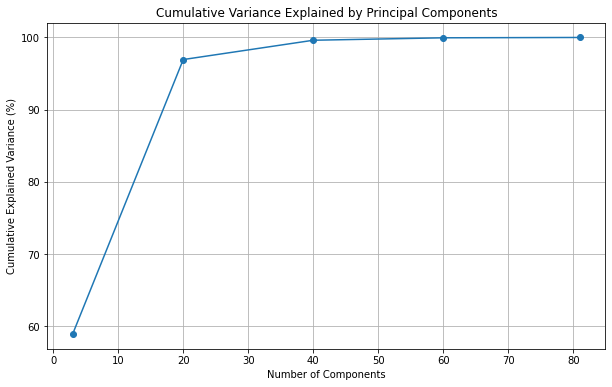

In [35]:
### START CODE ###
cumulative_variances = [result[3][-1] * 100 for result in res]
plt.figure(figsize=(10, 6))
plt.plot(nums, cumulative_variances, marker='o', linestyle='-')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.grid(True)
### END CODE ###
plt.show()

<div style="background-color: #B1D8B7; padding: 10px;">
   
With first 20 principal components we are able to capture ~97% of the variance in the data. We can clearly see the incremental variance captured by the next principal component keeps decreasing significantly after the 20th PC but it is at least significant till the 40th PC. But after the 40th PC there is not really any variance that is left to be captured. 

    
</div>

* **Part 4. (5 points)** For each of the reduced dataset, obtained in part 2.2, fit a linear regression model on the train data and show how adjusted $R^2$ varies as a function of # of components.(There will be a total of 5 ${R^2}$ score).


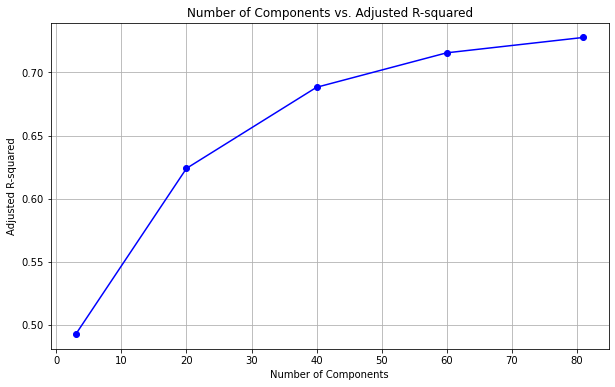

In [36]:
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
nums = [3,20,40,60,81]
adjusted_r_squared_values = []
res = []
for num in nums:

    ### START CODE ###
    ## Fit PCA components
    pca_new = PCA(n_components=num)
    pca_new.fit(X_train)
    ### END CODE ###


    ### START CODE ###
    ## Transform train and test data
    X_train_pca_new = pca_new.transform(X_train)
    X_test_pca_new = pca_new.transform(X_test)
    ### END CODE ###

    ### START CODE ###
    ## Compute explained variance
    var = pca_new.explained_variance_ratio_
    ### END CODE ###

    ### START CODE ###
    ## Fit LR and compute R-square and adjusted R-squared
    lr = LinearRegression()
    lr.fit(X_train_pca_new, Y_train)
    Y_pred = lr.predict(X_test_pca_new)
    r_squared = r2_score(Y_test, Y_pred)
    ### END CODE ###

    adjusted_r_squared = 1 - (1-r_squared)*(len(Y_test)-1)/(len(Y_test)-X_test_pca_new.shape[1]-1)
    adjusted_r_squared_values.append(adjusted_r_squared)

plt.figure(figsize=(10, 6))
plt.plot(nums, adjusted_r_squared_values, marker='o', linestyle='-', color='b')
plt.title('Number of Components vs. Adjusted R-squared')
plt.xlabel('Number of Components')
plt.ylabel('Adjusted R-squared')
plt.grid(True)
plt.show()


# Q5. (10 points) PCA vs T-SNE
* **Part 1.** **(3 points)** Now apply T-SNE to the dataset given above in Q4. You are required to carry out the following tasks:



1.   Initialize a t-SNE model with number of dimensions = 3, perplexity = 300, number of iterations = 300 and random state = 42
2.   Apply the t-SNE model to the training dataset











In [37]:
from sklearn.manifold import TSNE

### START CODE ###
## Initialize t-SNE model
tsne = TSNE(n_components=3, perplexity=300, n_iter=300, random_state=42)
### END CODE ###

### START CODE ###
## Fit and transform the data
X_train_tsne = tsne.fit_transform(X_train)
### END CODE ###

* **Part 2.** (3 points) For this part use a small subset of 500 samples of the training dataset and plot the first three t-SNE components similar to the PCA implementation above

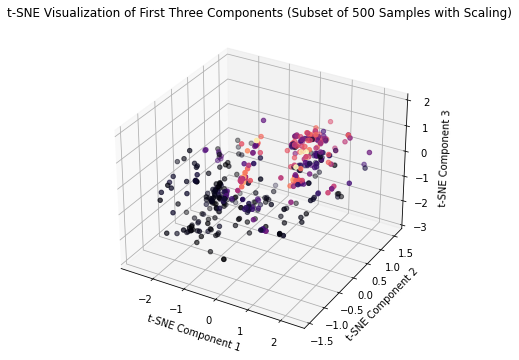

In [48]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

subset_size = 500
X_train_subset = X_train[:subset_size]

X_train_tsne = tsne.fit_transform(X_train_subset)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], X_train_tsne[:, 2], c=Y_train[:subset_size], cmap='magma')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.title('t-SNE Visualization of First Three Components (Subset of 500 Samples with Scaling)')
plt.show()


* **Part 3. (4 points)** Now we will plot the PCA and t-SNE projections of the data and compare the plots side-by-side to see the difference in scatters created by the two methods. You can use first 1000 data points for this.

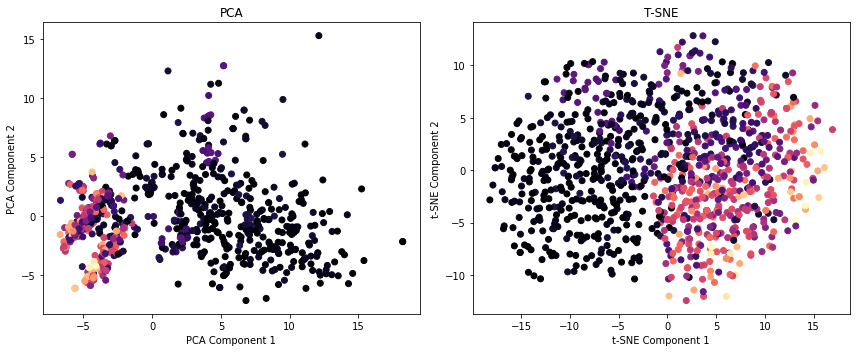

In [47]:
plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

# First subplot (left)

subset_size = 1000
X_train_subset = X_train[:subset_size]

### START CODE ###
### Obtain components from PCA
pca_components_x1 = pca.fit_transform(X_train_subset)

### Obtain components from t-SNE
tsne_components_x1 = tsne.fit_transform(X_train_subset)
### END CODE ###

plt.subplot(1, 2, 1)  # 1 row, 2 columns, select the first subplot
plt.title('PCA')

### START CODE ###
### scatter plot for PCA
plt.scatter(pca_components_x1[:, 0], pca_components_x1[:, 1], c=Y_train[:subset_size], cmap='magma')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
### END CODE ###


# Second subplot (right)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, select the second subplot

### START CODE ###
### scatter plot for t-SNE
plt.scatter(tsne_components_x1[:, 0], tsne_components_x1[:, 1], c=Y_train[:subset_size], cmap='magma')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
### END CODE ###

plt.title('T-SNE')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()